<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2: Generate Descriptive Statistics and Visualizations

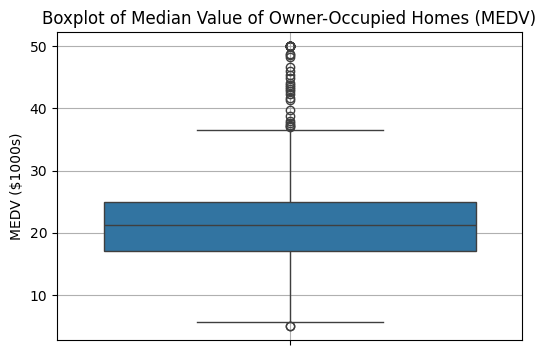

In [7]:
pyplot.figure(figsize=(6, 4))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('MEDV ($1000s)')
pyplot.grid(True)
pyplot.show()

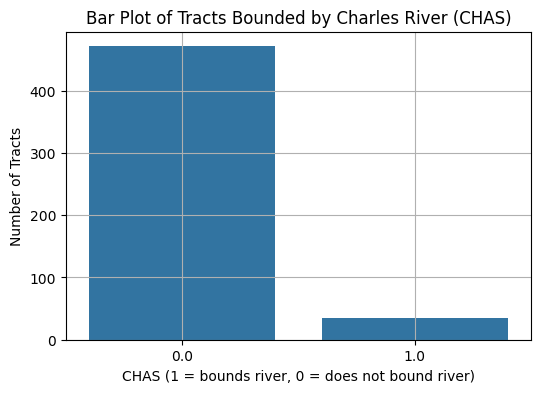

In [8]:
pyplot.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Tracts Bounded by Charles River (CHAS)')
pyplot.xlabel('CHAS (1 = bounds river, 0 = does not bound river)')
pyplot.ylabel('Number of Tracts')
pyplot.grid(True)
pyplot.show()

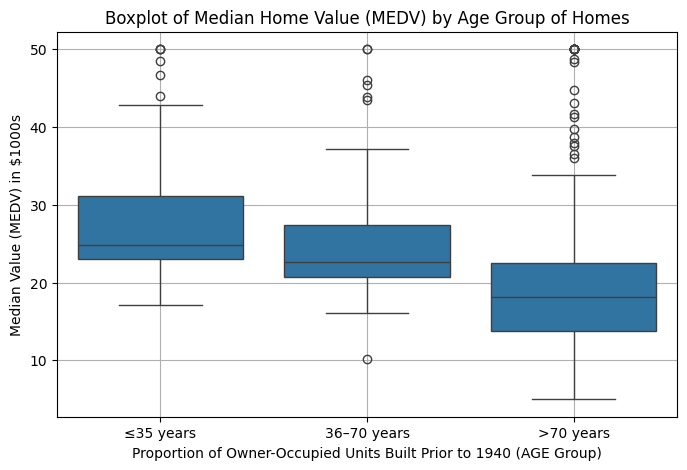

In [10]:
boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['≤35 years', '36–70 years', '>70 years']
)

pyplot.figure(figsize=(8, 5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Home Value (MEDV) by Age Group of Homes')
pyplot.xlabel('Proportion of Owner-Occupied Units Built Prior to 1940 (AGE Group)')
pyplot.ylabel('Median Value (MEDV) in $1000s')
pyplot.grid(True)
pyplot.show()

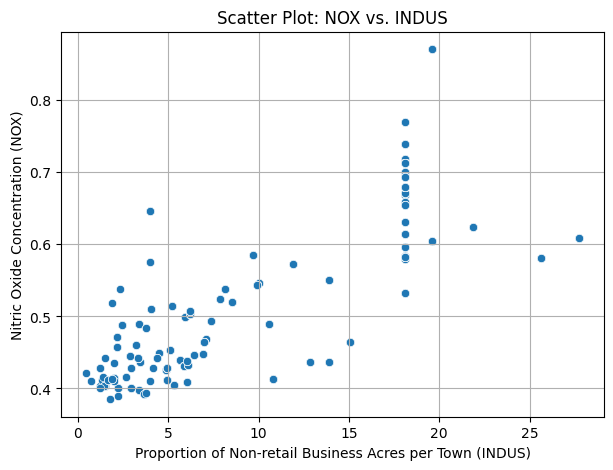

In [11]:
pyplot.figure(figsize=(7, 5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot: NOX vs. INDUS')
pyplot.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.grid(True)
pyplot.show()

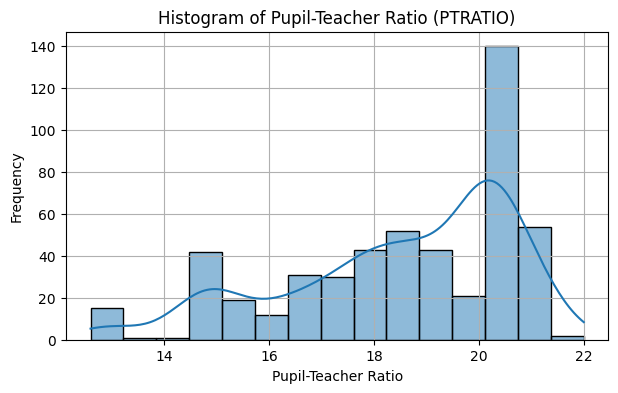

In [12]:
pyplot.figure(figsize=(7, 4))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.grid(True)
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.

In [13]:
# Hypothesis:-
# Group 1 = Houses not bounded by the river (CHAS = 0)
# Group 2 = Houses bounded by the river (CHAS = 1)
# Null Hypothesis (H₀):
# 𝜇1 = 𝜇2 (No difference in median home value)
# Alternative Hypothesis (H₁):
# 𝜇1 ≠ 𝜇2 (There is a difference)

from scipy.stats import ttest_ind
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value = ttest_ind(medv_chas_0, medv_chas_1, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis — there is a significant difference in median house values based on Charles River proximity.")
else:
    print("Conclusion: Fail to reject the null hypothesis — no significant difference in median house values based on Charles River proximity.")

T-statistic: -3.1133
P-value: 0.0036
Conclusion: Reject the null hypothesis — there is a significant difference in median house values based on Charles River proximity.


In [14]:
# Let:
# Group 1: AGE ≤ 35 years
# Group 2: 36 ≤ AGE ≤ 70 years
# Group 3: AGE > 70 years
# Null Hypothesis (H₀):
# μ1 = μ2 = μ3 (All groups have the same mean MEDV)
# Alternative Hypothesis (H₁):
# At least one group’s mean MEDV is different

import pandas as pd
from scipy.stats import f_oneway
boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['≤35 years', '36–70 years', '>70 years']
)
medv_1 = boston_df[boston_df['AGE_GROUP'] == '≤35 years']['MEDV']
medv_2 = boston_df[boston_df['AGE_GROUP'] == '36–70 years']['MEDV']
medv_3 = boston_df[boston_df['AGE_GROUP'] == '>70 years']['MEDV']
f_stat, p_value = f_oneway(medv_1, medv_2, medv_3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis — at least one AGE group has a significantly different median home value.")
else:
    print("Conclusion: Fail to reject the null hypothesis — no significant difference in median home values across AGE groups.")

F-statistic: 36.4076
P-value: 0.0000
Conclusion: Reject the null hypothesis — at least one AGE group has a significantly different median home value.


In [15]:
# Null Hypothesis (H₀):
# 𝜌 = 0 (There is no linear correlation between NOX and INDUS)
# Alternative Hypothesis (H₁):
# 𝜌 ≠ 0 (There is a linear correlation between NOX and INDUS)
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis — there is a significant linear relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis — no significant linear relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7637
P-value: 0.0000
Conclusion: Reject the null hypothesis — there is a significant linear relationship between NOX and INDUS.


In [16]:
# Null Hypothesis (H₀):
# 𝛽 = 0 (Distance has no impact on MEDV)
# Alternative Hypothesis (H₁):
# 𝛽 ≠ 0 (Distance has an impact on MEDV)
# Where:
# β is the slope of the regression line (i.e., the change in MEDV for every 1-unit increase in DIS)

import statsmodels.api as sm

X = boston_df[['DIS']]
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 May 2025   Prob (F-statistic):           1.21e-08
Time:                        15:47:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0